In [1]:
import numpy as np
import pandas as pd
import sklearn
import numpy as np

In [2]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-03.parquet')
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-03-01 00:10:52,2024-03-01 00:26:12,N,1.0,129,226,1.0,1.72,12.80,1.0,0.5,3.06,0.00,NaN,1.0,18.36,1.0,1.0,0.00
1,2,2024-03-01 00:22:21,2024-03-01 00:35:15,N,1.0,130,218,1.0,3.25,17.70,1.0,0.5,0.00,0.00,NaN,1.0,20.20,2.0,1.0,0.00
2,2,2024-03-01 00:45:27,2024-03-01 01:04:32,N,1.0,255,107,2.0,4.58,23.30,1.0,0.5,3.50,0.00,NaN,1.0,32.05,1.0,1.0,2.75
3,1,2024-03-01 00:02:00,2024-03-01 00:23:45,N,1.0,181,71,1.0,0.00,22.50,0.0,1.5,0.00,0.00,NaN,1.0,24.00,1.0,1.0,0.00
4,2,2024-03-01 00:16:45,2024-03-01 00:23:25,N,1.0,95,135,1.0,1.15,8.60,1.0,0.5,1.00,0.00,NaN,1.0,12.10,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57452,2,2024-03-31 21:19:00,2024-03-31 21:30:00,None,NaN,25,61,NaN,1.45,12.08,0.0,0.0,2.52,0.00,NaN,1.0,15.60,NaN,NaN,NaN
57453,2,2024-03-31 22:30:00,2024-03-31 22:35:00,None,NaN,41,42,NaN,1.13,12.24,0.0,0.0,0.00,0.00,NaN,1.0,13.24,NaN,NaN,NaN
57454,2,2024-03-31 22:43:00,2024-03-31 22:48:00,None,NaN,223,7,NaN,13062.08,12.08,0.0,0.0,3.77,0.00,NaN,1.0,16.85,NaN,NaN,NaN
57455,2,2024-03-31 22:48:00,2024-03-31 23:12:00,None,NaN,42,249,NaN,7.96,40.52,0.0,0.0,8.75,0.00,NaN,1.0,53.02,NaN,NaN,NaN


In [3]:

shape_of_data = df.shape
print("Shape of the dataset:", shape_of_data)


Shape of the dataset: (57457, 20)


Q1. Prepare the dataset
Start with baseline_model_nyc_taxi_data.ipynb. Download the March 2024 Green Taxi data. We will use this data to simulate a production usage of a taxi trip duration prediction service.

What is the shape of the downloaded data? How many rows are there?

72044
78537
57457
54396

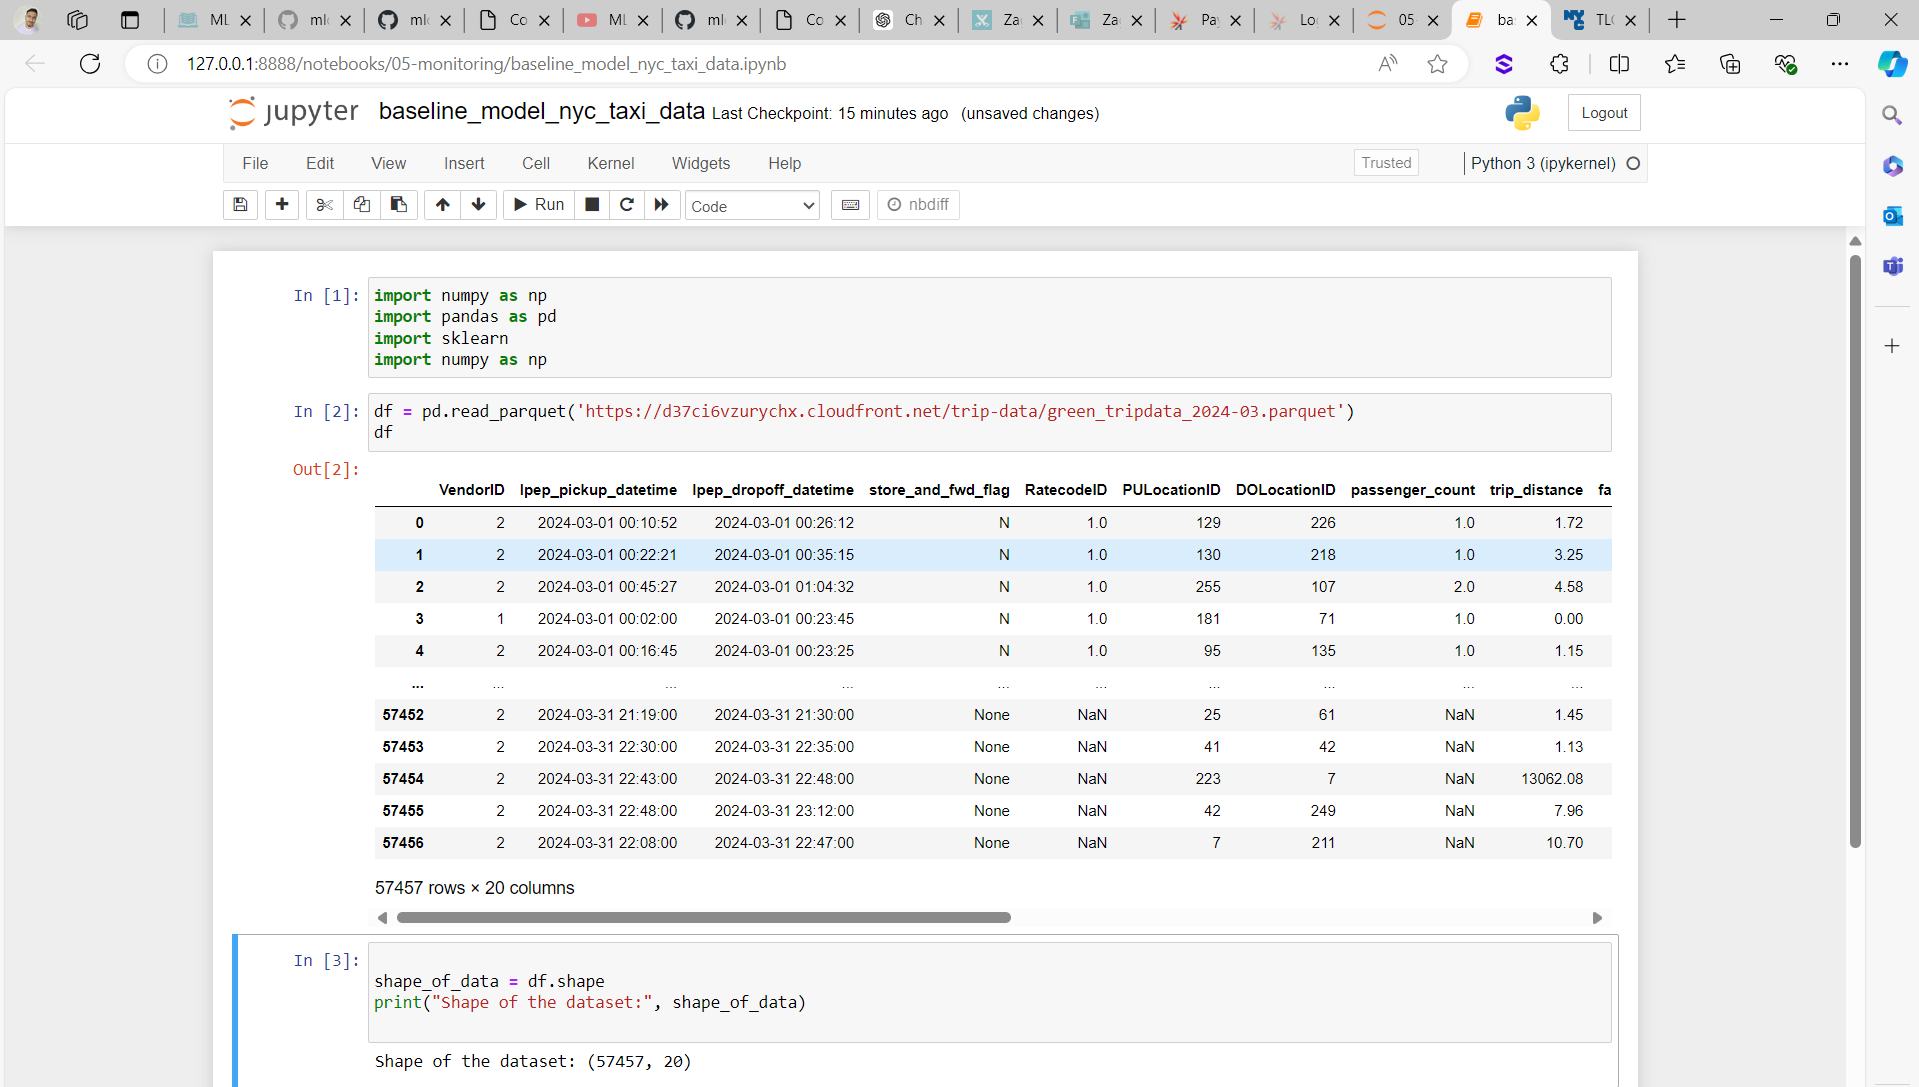

Answer: 57457

In [9]:
import pandas as pd
quantile_value = df['fare_amount'].quantile(0.5)
mean_value = df['fare_amount'].mean()
print(f"Quantile value for fare_amount column (quantile=0.5): {quantile_value}")
print(f"Mean value for fare_amount column: {mean_value}")


Quantile value for fare_amount column (quantile=0.5): 13.5
Mean value for fare_amount column: 17.31347425030893


In [38]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-03.parquet')

# Calculate the median (50th percentile) for fare_amount
fare_amount_median = np.nanquantile(df['fare_amount'], q=0.5)

print(f"The median fare amount is: {fare_amount_median}")


The median fare amount is: 13.5


Q2. Metric
Let's expand the number of data quality metrics we’d like to monitor! Please add one metric of your choice and a quantile value for the "fare_amount" column (quantile=0.5).

Hint: explore evidently metric ColumnQuantileMetric (from evidently.metrics import ColumnQuantileMetric)

What metric did you choose?

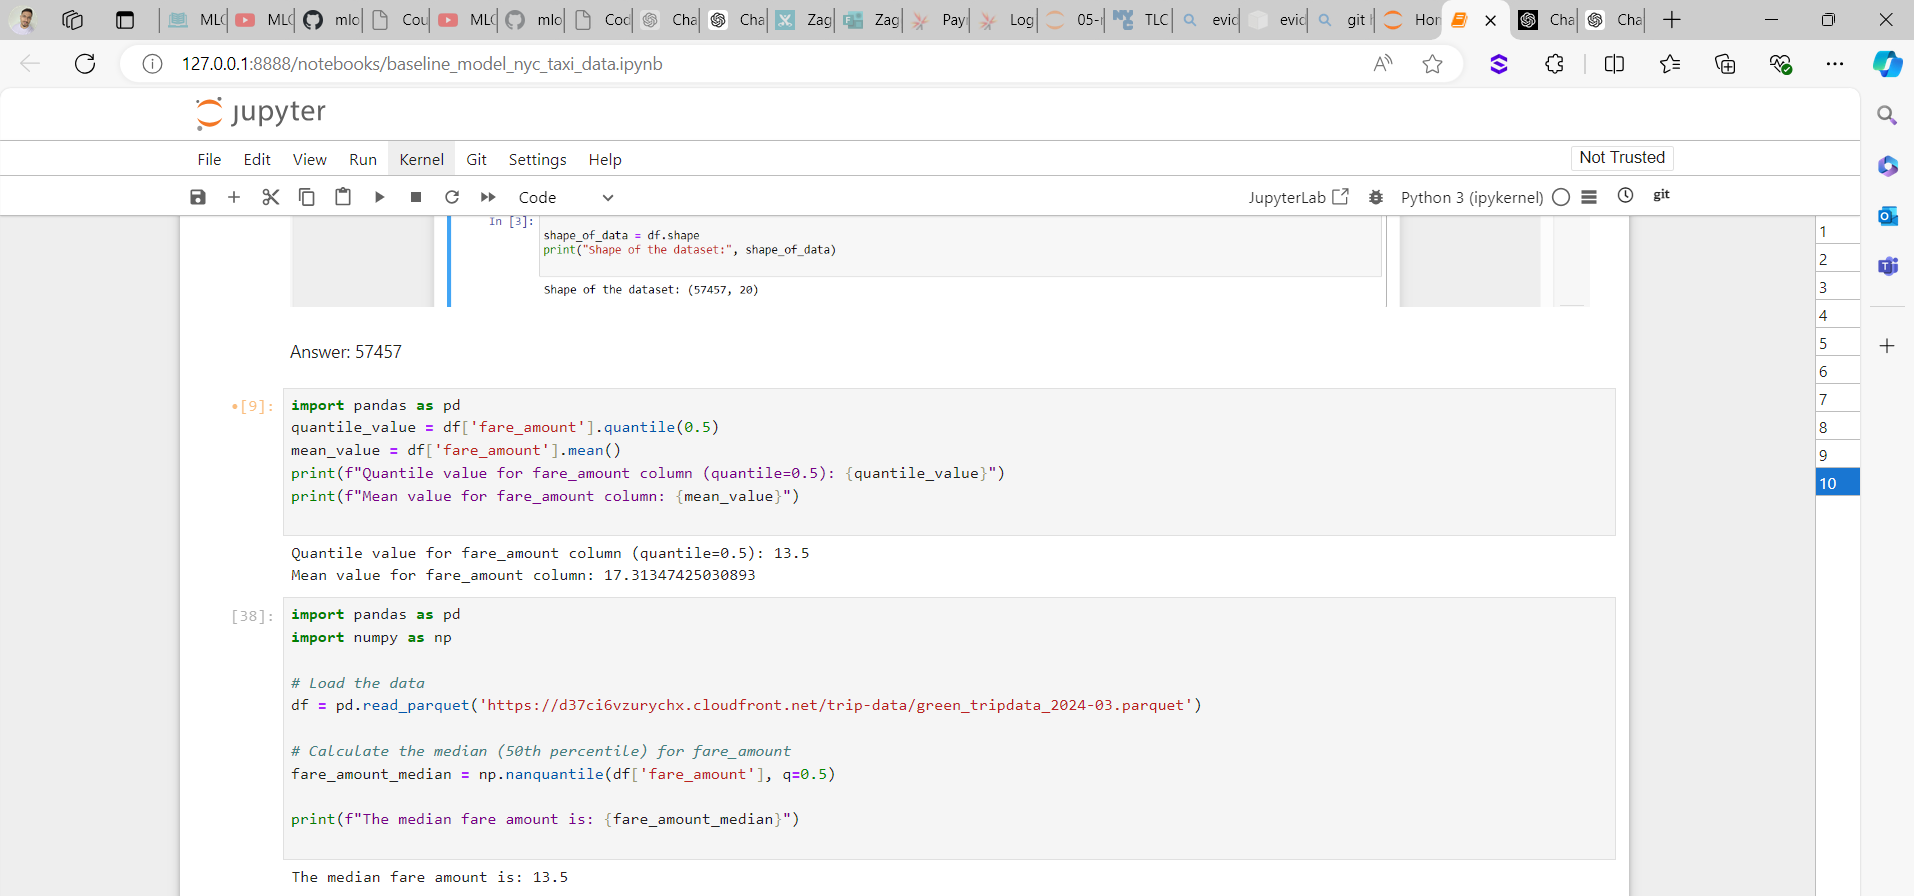

Answer: median (50th percentile) quantile for the "fare_amount" column

In [41]:
import pandas as pd

# Load the data for March 2024
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-03.parquet')

# Convert datetime columns to datetime format
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['date'] = df['lpep_pickup_datetime'].dt.date  # Extract date from datetime

# Group by date and calculate daily median fare_amount
daily_medians = df.groupby('date')['fare_amount'].median()

# Find the maximum median value
max_median = daily_medians.max()

print(f"The maximum daily median fare amount for March 2024 (quantile=0.5) is: {max_median}")


The maximum daily median fare amount for March 2024 (quantile=0.5) is: 75.0
